# Group Exercise - Creating Visualizations While Exploring Data

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

with open('config.json', 'rt') as config:
    key = json.load(config)['key']

Create Census DataFrame

In [2]:
url = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key={key}'

json_code = requests.get(url).json()

with open('census_data_2018.json','wt') as census:
    json.dump(json_code, census)
    
census_df = pd.read_json('census_data_2018.json')

census_df.rename(columns=census_df.iloc[0],inplace=True)

census_df.drop(0,inplace=True)

census_df.drop(columns=['us','SEX','GEO_ID','ETH_GROUP','VET_GROUP','FIRMPDEMP_F','RCPPDEMP_F','EMP_F','FIRMPDEMP_S_F','RCPPDEMP_S_F','EMP_S_F','PAYANN_S_F','PAYANN_F'],inplace=True,axis=1)

census_df.head()

,NAME,NAICS2017,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S
1,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,001,All firms,2018,84496,91103725,722654,21975675,3.0,8.9,7.7,7.0
2,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,611,Firms with no employees,2018,10036,3233978,0,499996,4.7,19.2,0.0,13.5
3,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,612,Firms with 1 to 4 employees,2018,47105,15792524,92631,2808773,4.7,8.2,4.8,7.4
4,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,620,Firms with 5 to 9 employees,2018,12523,10688294,83449,2601817,5.9,4.3,5.6,6.3
5,United States,00,Total for all sectors,Female,Hispanic,00,Total,Total,630,Firms with 10 to 19 employees,2018,8516,14105603,116479,3506384,6.0,16.2,6.7,10.7


Create race group dataframe:

In [3]:
race_groups_only = census_df[census_df['RACE_GROUP_LABEL']!='Total']

race_emps = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','EMP']]

race_emps['EMP'] = pd.to_numeric(race_emps['EMP'])

race_emps = race_emps[(race_emps['RACE_GROUP_LABEL'] != 'Classifiable') & (race_emps['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_emps['RACE_GROUP_LABEL'] != 'Nonminority') & (race_emps['RACE_GROUP_LABEL'] != 'Minority') & (race_emps['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

C:\Users\dfbod\AppData\Local\Temp/ipykernel_18572/3827541343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_emps['EMP'] = pd.to_numeric(race_emps['EMP'])


Text(0.5, 1.0, 'Average Number of Employees by Race')

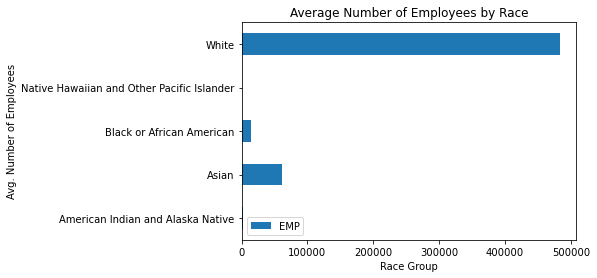

In [4]:
avg_num_employees = race_emps.groupby(by='RACE_GROUP_LABEL').mean()
avg_num_employees.plot.barh()
plt.xlabel('Race Group')
plt.ylabel('Avg. Number of Employees')
plt.title('Average Number of Employees by Race')

## Race vs. Annual payments

In [5]:
race_payann = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','PAYANN']]

race_payann['PAYANN'] = pd.to_numeric(race_payann['PAYANN'])

race_payann = race_payann[(race_payann['RACE_GROUP_LABEL'] != 'Classifiable') & (race_payann['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_payann['RACE_GROUP_LABEL'] != 'Nonminority') & (race_payann['RACE_GROUP_LABEL'] != 'Minority') & (race_payann['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_pay_by_race = race_payann.groupby('RACE_GROUP_LABEL').mean()

race_groups = list(avg_pay_by_race.index)

def normalization(indexlist, elementlist, df):
    new_column = []
    for index in indexlist:
        for element in elementlist:
            if (indexlist.index(index)==elementlist.index(element)):
                new_column.append(element[0]/(avg_num_employees.loc[index].values[0]))
                
    return new_column

avg_pay_by_race['normalized_avg_pay'] = normalization(race_groups, list(avg_pay_by_race.values), avg_pay_by_race)
avg_pay_by_race['Race Group'] = race_groups

avg_pay_by_race

C:\Users\dfbod\AppData\Local\Temp/ipykernel_18572/657907053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_payann['PAYANN'] = pd.to_numeric(race_payann['PAYANN'])


,PAYANN,normalized_avg_pay,Race Group
RACE_GROUP_LABEL,,,
American Indian and Alaska Native,1.048229e+05,41.310336,American Indian and Alaska Native
Asian,2.112672e+06,34.693961,Asian
Black or African American,4.417288e+05,31.258676,Black or African American
Native Hawaiian and Other Pacific Islander,2.178602e+04,41.728513,Native Hawaiian and Other Pacific Islander
White,2.193165e+07,45.293934,White


Text(0.5, 1.0, 'Average Annual Pay Rate ($1000s) by Race - 2018')

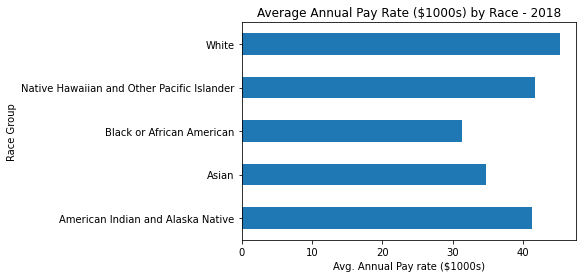

In [6]:
avg_pay_by_race.plot.barh(y='normalized_avg_pay',x='Race Group',legend=None)
# plt.errorbar(xerr=,yerr=)
plt.xlabel('Avg. Annual Pay rate ($1000s)')
plt.ylabel('Race Group')
plt.title('Average Annual Pay Rate ($1000s) by Race - 2018')

May need to normalize number by dividing by total employee populations for more accurate representation of pay rates. Regardless, if the White race group has roughly an 8 times larger average population than the Asian race group, which would make these two race groups more comparable, but there would still be a siginificant discrepancy when looking at other race groups.

## Race vs. Total Sales (\$)

In [7]:
race_sales = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','RCPPDEMP']]

race_sales['RCPPDEMP'] = pd.to_numeric(race_sales['RCPPDEMP'])

race_sales = race_sales[(race_sales['RACE_GROUP_LABEL'] != 'Classifiable') & (race_sales['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_sales['RACE_GROUP_LABEL'] != 'Nonminority') & (race_sales['RACE_GROUP_LABEL'] != 'Minority') & (race_sales['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_total_sales_by_race = race_sales.groupby('RACE_GROUP_LABEL').mean()

avg_total_sales_by_race['normalized_avg_sales'] = normalization(race_groups, list(avg_total_sales_by_race.values),avg_total_sales_by_race)

avg_total_sales_by_race['Race Group'] = list(avg_total_sales_by_race.index)

avg_total_sales_by_race

C:\Users\dfbod\AppData\Local\Temp/ipykernel_18572/2178480815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_sales['RCPPDEMP'] = pd.to_numeric(race_sales['RCPPDEMP'])


,RCPPDEMP,normalized_avg_sales,Race Group
RACE_GROUP_LABEL,,,
American Indian and Alaska Native,2.545436e+05,100.314740,American Indian and Alaska Native
Asian,5.361995e+06,88.053806,Asian
Black or African American,8.114463e+05,57.421515,Black or African American
Native Hawaiian and Other Pacific Islander,7.259541e+04,139.047822,Native Hawaiian and Other Pacific Islander
White,5.691404e+07,117.540642,White


Text(0.5, 1.0, 'Average Total Sales ($1000) by Race - 2018')

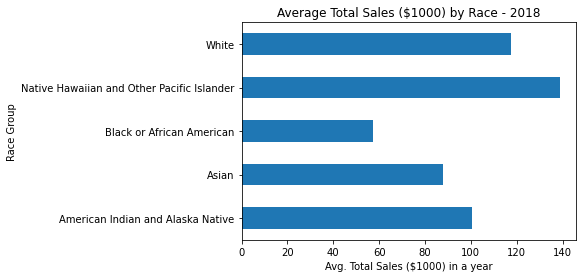

In [8]:
avg_total_sales_by_race.plot.barh(y='normalized_avg_sales', x='Race Group', legend=None)
plt.ylabel('Race Group')
plt.xlabel('Avg. Total Sales ($1000) in a year')
plt.title('Average Total Sales ($1000) by Race - 2018')